<a href="https://colab.research.google.com/github/Diwakarmogarala/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview of my project
This project is about Cardiovascular disease. Initially I want to find the most common disease in US so that I can work on it. So on using the dataset https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD I came to know that Cardiovascular disease is the most commonly affected in US next to cancer. Here I want to prepare heart diseased patients with stroke disease. So I used following datasets. Here I want to see the etiological pattern and cost charging for those diseased people and also I want to prepare my dataset for a machine learning model, so I would like to do data processing and balance the data if there is any imbalance in my target column using imblearn module.


### About datasets.

#### https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD
CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources

#### https://data.world/cms/heart-attack-payment-hospital
The dataset is about the payment for heart attack patients measure–provider data. This data set includes provider data for payments associated with a 30-day episode of care for heart attack patients.

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

https://data.world/informatics-edu/heart-disease-prediction/workspace/file?filename=+Heart_Disease_Prediction.csv

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [1]:
# Importing all the packages and modules that I am going to use in this project.
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.wkt import loads
from imblearn.under_sampling import RandomUnderSampler

In [2]:
def json_import(url = ''):
  """(str) -> pandas.core.frame.DataFrame
  Here I created the json_import function where I use the JSON file download link as input. Using the requests module I extracted the contents from the url.
  then I created a JSON file in my directory to write the contents in the url. Then I opened the JSON file using json module. Here I created a column_list for
  storing column names in an order. There is an issue in extracting column names because it has colons so I replace it with empty string and then started to append
  empty list. In my json file there was a list of data so I created a dataframe using that data and column names as newly created list.
  """
  text = requests.get(url)
  with open('data.json','w') as info:
    info.write(text.text)
  disease_json = json.load(open('data.json'))
  column_list = []
  for each_column in disease_json['meta']['view']['columns']:
    column_list.append(each_column['fieldName'].replace(':','').strip())
  disease = pd.DataFrame(disease_json['data'], columns=column_list)
  return disease

In [3]:
# In a new variable called disease I loaded the data frame created using https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD
disease = json_import('https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD')

In [4]:
# This is dataframe overview
pd.options.display.max_columns=50
disease.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,geolocation,responseid,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
0,row-nazc.ye5n~eubq,00000000-0000-0000-2B56-4922780F3411,0,1675079585,None,1675079681,None,{ },2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,916,916,None,None,None,None,Gender,Male,None,None,None,None,POINT (-92.27449074299966 34.74865012400045),None,05,AST,AST3_1,NMBR,GENDER,GENM,None,None,None,None
1,row-idyy_bbyg.a6f8,00000000-0000-0000-8072-CA0CACFA7316,0,1675079585,None,1675079681,None,{ },2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,2227,2227,None,None,None,None,Overall,Overall,None,None,None,None,POINT (-106.13361092099967 38.843840757000464),None,08,AST,AST3_1,NMBR,OVERALL,OVR,None,None,None,None
2,row-5aze_ijyw_wxw7,00000000-0000-0000-1849-0D82E305FFD4,0,1675079585,None,1675079681,None,{ },2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,708,708,None,None,None,None,Overall,Overall,None,None,None,None,POINT (-77.036871 38.907192),None,11,AST,AST3_1,NMBR,OVERALL,OVR,None,None,None,None
3,row-fkj3.se4f.kcix,00000000-0000-0000-9E3F-CD3362718287,0,1675079585,None,1675079681,None,{ },2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,3520,3520,None,None,None,None,Gender,Female,None,None,None,None,POINT (-83.62758034599966 32.83968109300048),None,13,AST,AST3_1,NMBR,GENDER,GENF,None,None,None,None
4,row-8e7i_7mk6~rn8b,00000000-0000-0000-C7DD-D4F65C81A8BE,0,1675079585,None,1675079684,None,{ },2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,123,123,None,None,None,None,Race/Ethnicity,Hispanic,None,None,None,None,POINT (-84.71439026999968 44.6613195430005),None,26,AST,AST3_1,NMBR,RACE,HIS,None,None,None,None


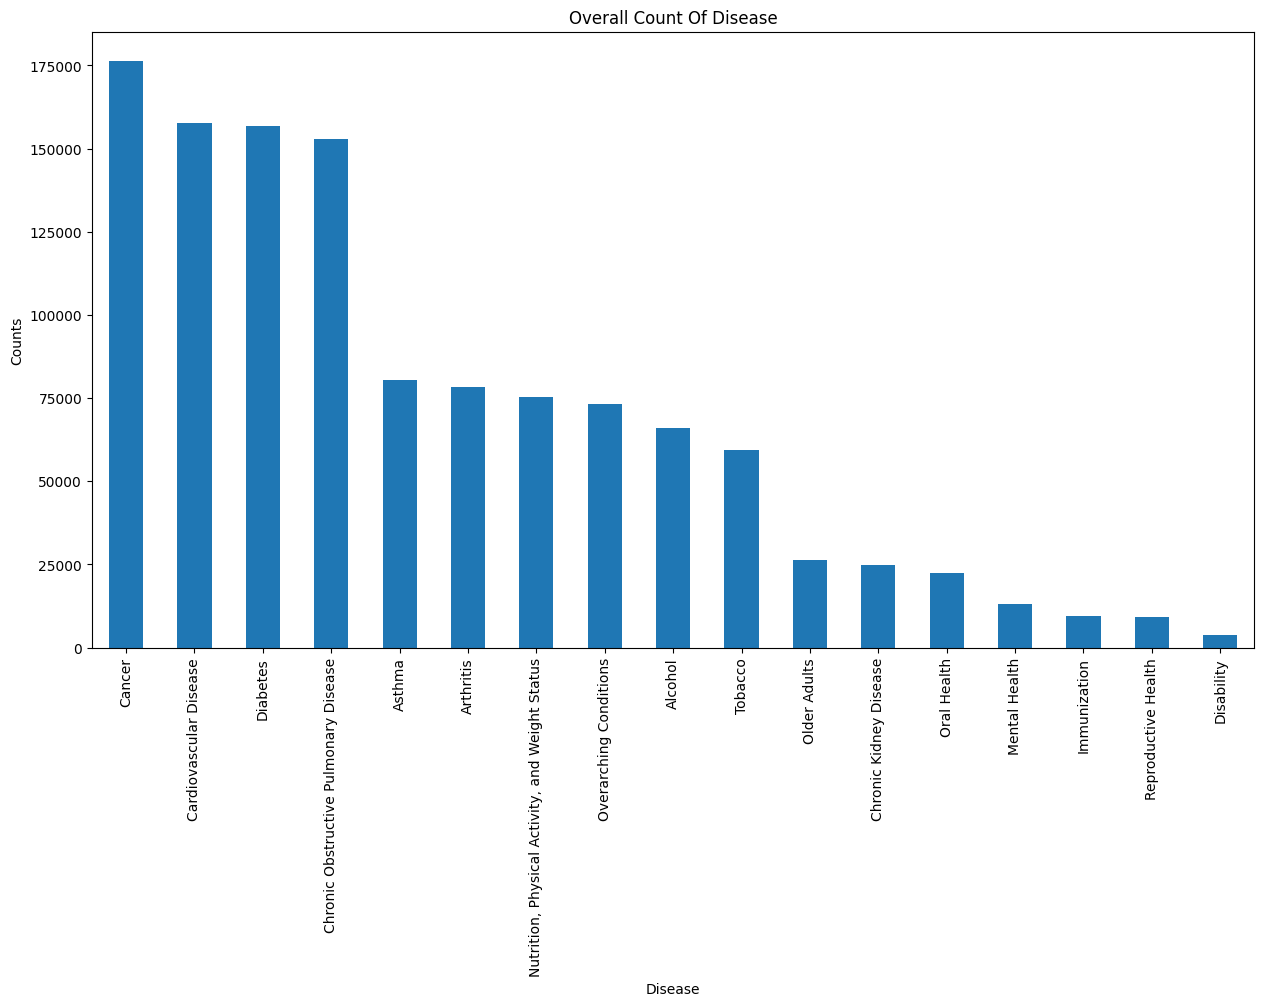

In [28]:
# I want to find what are the cases that were mostly seen in USA. So I did value_counts for the topic column and obtained column was plotted as a bar graph.
disease.topic.value_counts().plot(kind = 'bar', figsize=(15,8))
plt.title('Overall Count Of Disease')
plt.xlabel('Disease')
plt.ylabel('Counts')
plt.show()
# Datasets regarding cancer were complex because they go with images or they are using the mutated gene sequencing so I would like to select next followed disease.
# i.e.. Cardiovascular Disease.

In [5]:
# Here Iam taking Year start and topic column seperately and then i am pivoting the year start as index and topics as columns and I am and the values should be their
#categorical value_counts.
cvd = disease[['yearstart','topic']].pivot_table(index = 'yearstart', columns = 'topic', values = 'yearstart', aggfunc= 'value_counts')
cvd

topic,Alcohol,Arthritis,Asthma,Cancer,Cardiovascular Disease,Chronic Kidney Disease,Chronic Obstructive Pulmonary Disease,Diabetes,Disability,Immunization,Mental Health,"Nutrition, Physical Activity, and Weight Status",Older Adults,Oral Health,Overarching Conditions,Reproductive Health,Tobacco
yearstart,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
2008,NaN,NaN,NaN,19968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,19968.0,NaN,NaN,NaN,55.0,NaN,NaN,55.0,NaN,NaN,55.0,367.0,NaN,NaN
2010,1282.0,NaN,2442.0,19968.0,8847.0,1227.0,7518.0,3970.0,424.0,NaN,NaN,164.0,1680.0,NaN,1975.0,NaN,NaN
2011,5467.0,8700.0,5902.0,19968.0,14723.0,2305.0,11910.0,13219.0,424.0,870.0,1195.0,4785.0,1680.0,NaN,6105.0,380.0,4730.0
2012,5839.0,5220.0,5902.0,22463.0,10863.0,2305.0,11910.0,12349.0,424.0,870.0,1195.0,4245.0,3420.0,3855.0,6975.0,855.0,4995.0
2013,6124.0,8700.0,7171.0,21593.0,15880.0,2305.0,14016.0,14431.0,424.0,870.0,1195.0,10528.0,1680.0,327.0,6975.0,869.0,5714.0
2014,5718.0,5220.0,8494.0,22463.0,13461.0,2305.0,17103.0,14947.0,424.0,870.0,1195.0,4245.0,3420.0,3841.0,6975.0,827.0,5253.0


Text(0, 0.5, 'Counts')

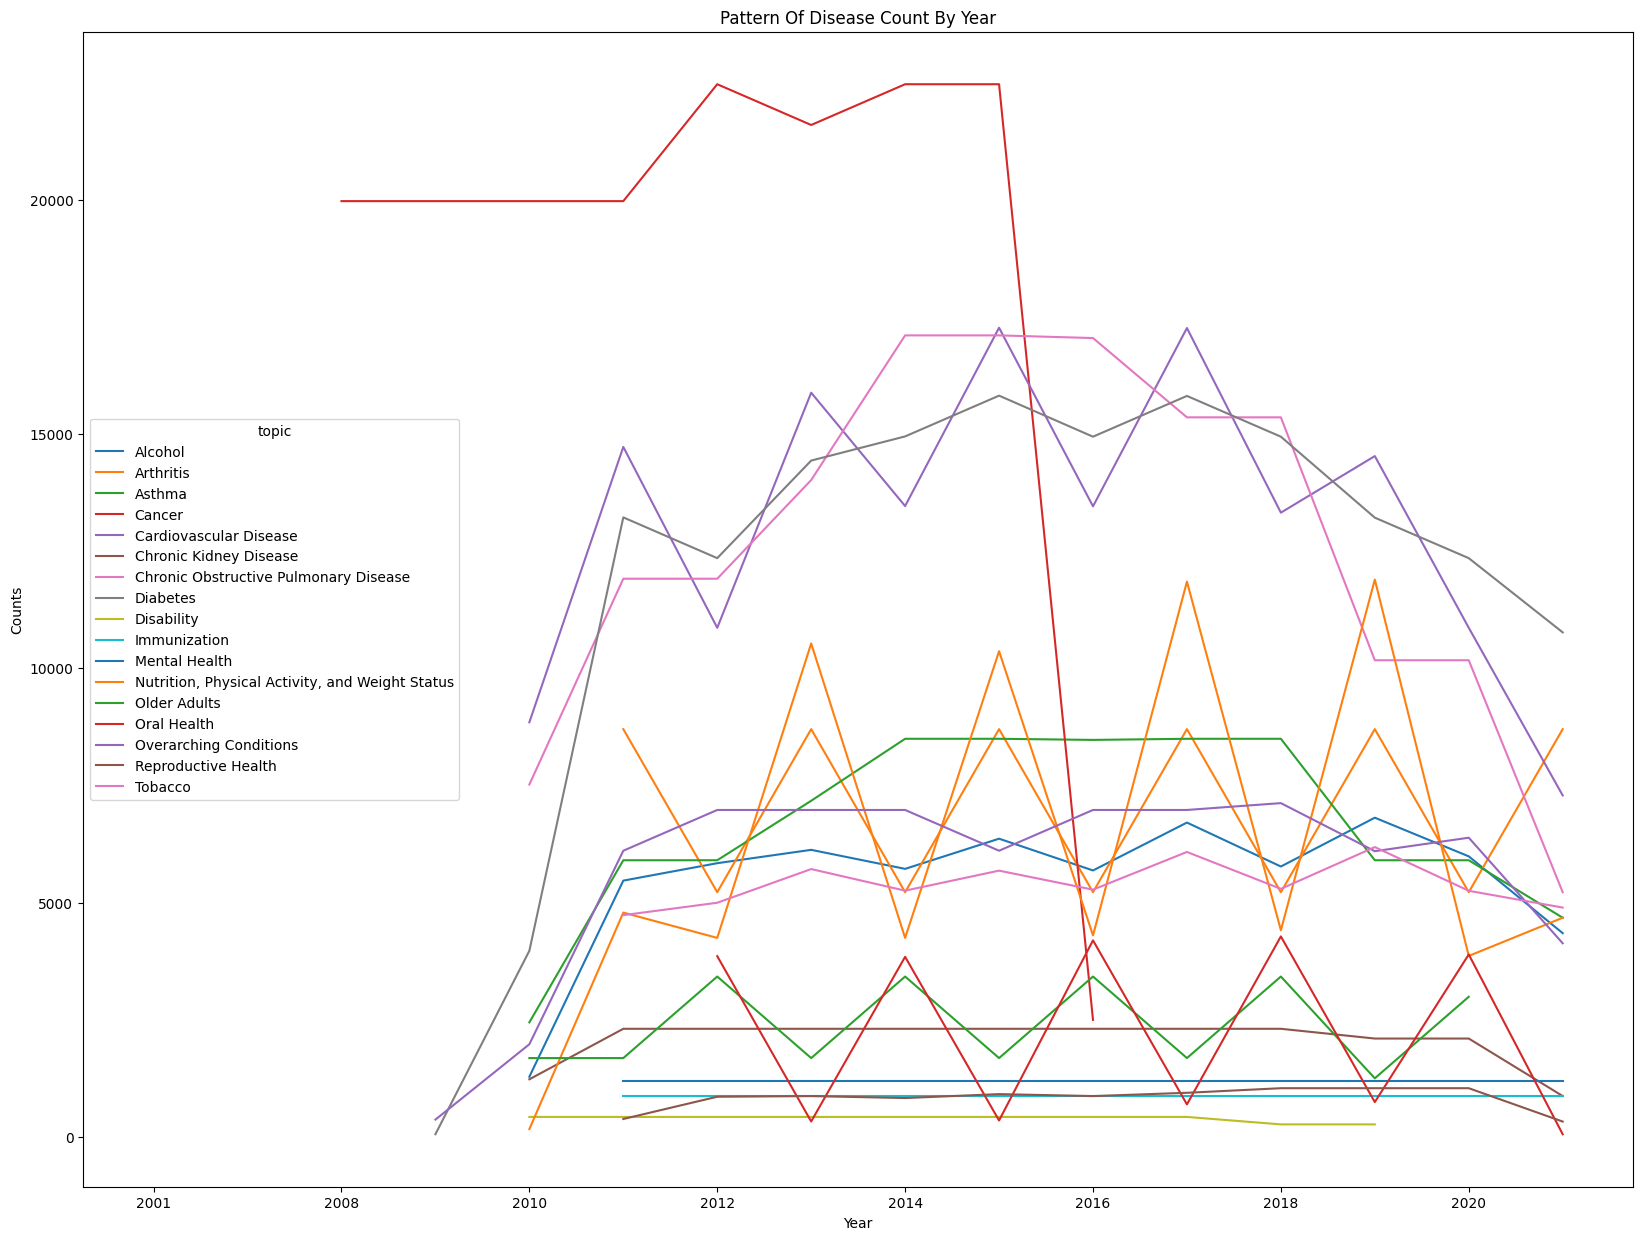

In [30]:
# Plotting above dataframe columns with index on x axis and different columns as line graph.
cvd.plot(figsize=(20,15))
plt.title('Pattern Of Disease Count By Year')
plt.xlabel('Year')
plt.ylabel('Counts')

## Graph Overview
When we see this graph we can tell that cancer cases are high initially and then it gradually decreases from 2015 later COPD Hypertension and Diabetes are in similar ranges. In the end, diabetes is the top one, but most recorded were cardiovascular diseases where it was an irregular pattern.

Text(0.5, 1.0, 'Cardiovascular Disease Yearly Count ')

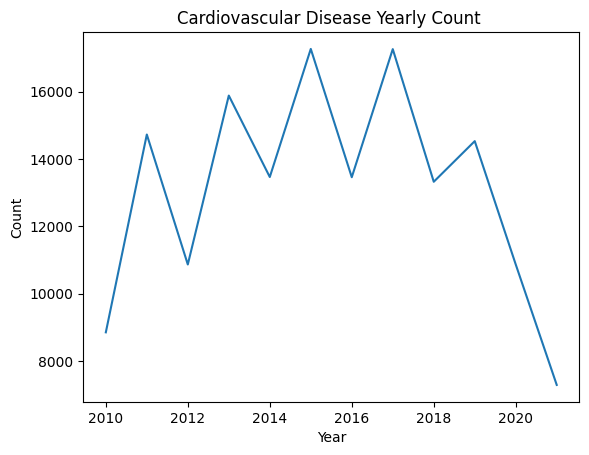

In [31]:
# Here I am filtering the dataset containing only cardiovascular disease
heart_disease = disease[disease['topic'] == 'Cardiovascular Disease']
cvd['Cardiovascular Disease'].plot() # Plotting cardiovascular disease count yearly.
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Cardiovascular Disease Yearly Count ')

<ipython-input-10-b4a5ed2e0604>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-10-b4a5ed2e0604>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease['geometry'] = heart_disease['geolocation'].apply(lambda geo: loads(geo) if not pd.isna(geo) else None)
<ipython-input-10-b4a5ed2e0604>:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  p

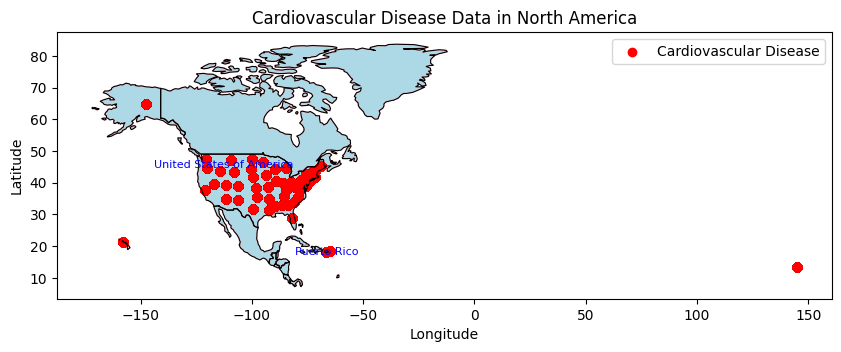

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads
import matplotlib.pyplot as plt

# Load the natural earth dataset
geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for North America
geo_earth = geo_earth[geo_earth['continent'] == 'North America']

# Convert 'GeoLocation' to Shapely Point geometries
heart_disease['geometry'] = heart_disease['geolocation'].apply(lambda geo: loads(geo) if not pd.isna(geo) else None)

# Convert to GeoDataFrame
cvd_geo = gpd.GeoDataFrame(heart_disease, geometry='geometry')

# Set CRS for cvd_geo (assuming it's the same as geo_earth)
cvd_geo = cvd_geo.set_crs(geo_earth.crs)

# Plotting the base map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot North America map
geo_earth.plot(ax=ax, color='lightblue', edgecolor='pink', label='North America')

# Plot the cardiovascular disease data
cvd_geo.plot(ax=ax, color='red', label='Cardiovascular Disease')

# Plot state boundaries
geo_earth.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Mark each state where cardiovascular disease points are located
for idx, state in geo_earth.iterrows():
    state_name = state['name']
    state_boundary = state['geometry']

    # Check if there are cardiovascular disease points in the state
    points_in_state = cvd_geo[cvd_geo.intersects(state_boundary)]

    if not points_in_state.empty:
        # Get the centroid of the state boundary
        centroid = state_boundary.centroid

        # Plot a marker at the centroid with the state name
        ax.annotate(state_name, (centroid.x, centroid.y), color='blue', fontsize=8, ha='center', va='center')

# Title and labels
ax.set_title('Cardiovascular Disease Data in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show legend
plt.legend()

# Show the plot
plt.show()


## Graph
 These are the places where cardiovascular cases are collected in USA.

In [14]:
# I am going to delete the columns with no values.
def del_empty_columns(dataset = pd.DataFrame({'g':[1,2,3,]})):
  """(pandas.core.frame.DataFrame) -> None
  Here we are removing fully emptied columns. Initially, we are getting how many null data in respective columns
  we are making them into a dictionary where keys are columns and the values as their count. Now using for loop we are accessing the keys and values.
  If any column has null data count as total number of rows, then we were removing the column from the dataframe
  """
  dataset_nulldata = dict(dataset.isnull().sum())
  for column,count in dataset_nulldata.items():

    if dataset_nulldata[column] == dataset.shape[0]:
      del dataset[column]

# Running the function using our dataframe
del_empty_columns(dataset = heart_disease)


In [15]:
heart_disease

,sid,id,position,created_at,updated_at,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1
132,row-4e24-btec_dc2a,00000000-0000-0000-6467-EA4D1682BA18,0,1675079585,1675079742,{ },2016,2016,ID,Idaho,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,36,36,None,None,None,None,Race/Ethnicity,Hispanic,POINT (-114.3637300419997 43.682630005000476),16,CVD,CVD1_4,NMBR,RACE,HIS
133,row-5ddj.tw87~92se,00000000-0000-0000-4D60-5B8F2B7E7D8F,0,1675079585,1675079742,{ },2012,2012,MA,Massachusetts,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,2671,2671,None,None,None,None,Gender,Male,POINT (-72.08269067499964 42.27687047000046),25,CVD,CVD1_4,NMBR,GENDER,GENM
134,row-huec~vizz~gi7c,00000000-0000-0000-548B-89B0A68F3589,0,1675079585,1675079742,{ },2014,2014,MD,Maryland,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,2048,2048,None,None,None,None,Gender,Female,POINT (-76.60926011099963 39.29058096400047),24,CVD,CVD1_4,NMBR,GENDER,GENF
135,row-vgxp~3u4m.vmre,00000000-0000-0000-6792-0420970CF90B,0,1675079585,1675079742,{ },2014,2014,MS,Mississippi,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,2397,2397,None,None,None,None,Gender,Female,POINT (-89.53803082499968 32.745510099000455),28,CVD,CVD1_4,NMBR,GENDER,GENF
136,row-9yj7~nzh8.yudt,00000000-0000-0000-C112-26DEEA0E6F1F,0,1675079585,1675079742,{ },2011,2011,SD,South Dakota,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,432,432,None,None,None,None,Gender,Male,POINT (-100.3735306369997 44.353130053000484),46,CVD,CVD1_4,NMBR,GENDER,GENM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185476,row-dqph~p2ym~42am,00000000-0000-0000-E042-578153FD080D,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD10_2,AGEADJPREV,RACE,MRC
1185477,row-jhwe~3w2i_n4jk,00000000-0000-0000-6641-96C7E0F8FB83,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD9_1,AGEADJPREV,RACE,HIS
1185528,row-azw6_pkye_68kt,00000000-0000-0000-949E-BDAF1290F1AD,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD10_2,CRDPREV,RACE,HIS
1185637,row-sxrd_urh8.vxz7,00000000-0000-0000-0A8E-C3C2139A5BBC,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD9_2,CRDPREV,RACE,HIS


Text(0, 0.5, 'Count')

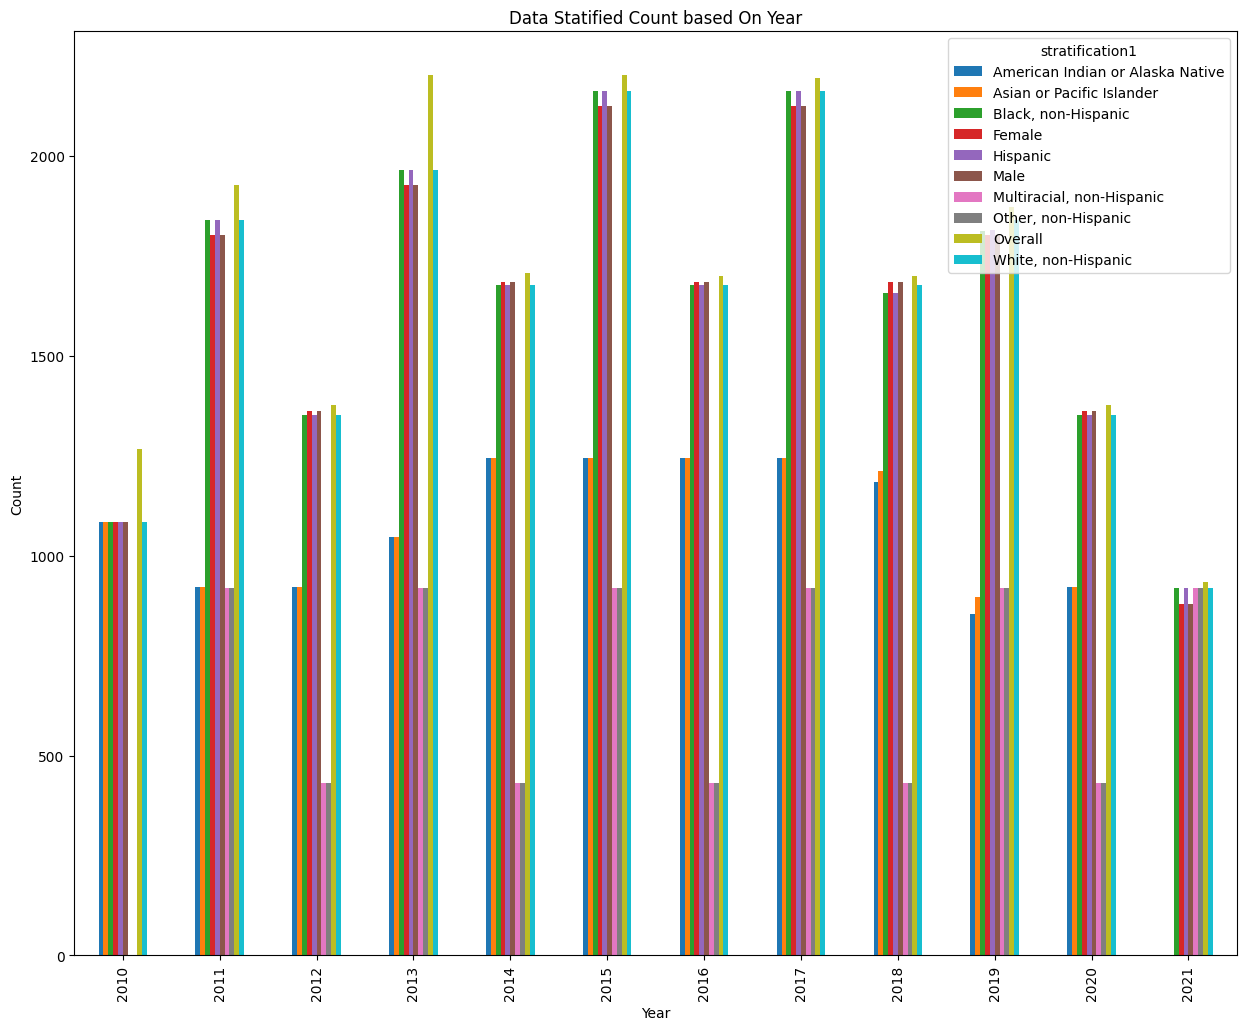

In [32]:
# Here the dataset was stratified like this. In every year the proportion was similar because the data may be standardized.
cvd_stratify = heart_disease[['yearstart','stratification1']].pivot_table(index = 'yearstart', columns = 'stratification1', values = 'stratification1', aggfunc= 'value_counts')
cvd_stratify.plot(kind = 'bar', figsize = (15,12))
plt.title('Data Statified Count based On Year')
plt.xlabel('Year')
plt.ylabel('Count')

https://data.world/cms/heart-attack-payment-hospital

In [11]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [16]:
heart = pd.read_csv('https://query.data.world/s/ohawsmy5ofjjn2mtchfe5j7mclfijt?dws=00000')

In [17]:
heart = heart[heart['Payment measure name']=='Payment for heart attack patients']
heart.head()

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,Payment category,Denominator,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,PAYM_30_AMI,No Different than the National Average Payment,53,$23171.00,"$20,404","$26,226",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart attack patients,PAYM_30_AMI,Number of Cases Too Small,Not Available,NaN,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"
6,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Payment for heart attack patients,PAYM_30_AMI,Less than the National Average Payment,186,$20007.00,"$18,418","$21,732",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and lower payment,NaN,07/01/2012,06/30/2015,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL 35801\n"
9,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,9072123675,Payment for heart attack patients,PAYM_30_AMI,No Different than the National Average Payment,318,$24309.00,"$22,554","$26,252",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"BOX 196604\nANCHORAGE, AK 99508\n"
12,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Payment for heart attack patients,PAYM_30_AMI,Number of Cases Too Small,Not Available,NaN,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"PO BOX 287\nBETHEL, AK 99559\n"


In [18]:
heart['Lower estimate'] = heart['Lower estimate'].str.replace('$','')
heart['Lower estimate'] = heart['Lower estimate'].str.replace(',','')
heart['Lower estimate'] = heart['Lower estimate'].str.replace('Not Available','')
heart['Lower estimate'] = pd.to_numeric(heart['Lower estimate'])
heart['Higher estimate'] = heart['Higher estimate'].str.replace('$','')
heart['Higher estimate'] = heart['Higher estimate'].str.replace(',','')
heart['Higher estimate'] = heart['Higher estimate'].str.replace('Not Available','')
heart['Higher estimate'] = pd.to_numeric(heart['Higher estimate'])

heart['Payment'] = heart['Payment'].str.replace('$','')
heart['Payment'] = heart['Payment'].str.replace(',','')
heart['Payment'] = heart['Payment'].str.replace('Not Available','')
heart['Payment'] = pd.to_numeric(heart['Payment'])

<ipython-input-18-26494ccf999d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Lower estimate'] = heart['Lower estimate'].str.replace('$','')
<ipython-input-18-26494ccf999d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Higher estimate'] = heart['Higher estimate'].str.replace('$','')
<ipython-input-18-26494ccf999d>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Payment'] = heart['Payment'].str.replace('$','')


In [19]:
heart.columns

Index(['Provider ID', 'Hospital name', 'Address', 'City', 'State', 'ZIP Code',
       'County name', 'Phone number', 'Payment measure name',
       'Payment measure ID', 'Payment category', 'Denominator', 'Payment',
       'Lower estimate', 'Higher estimate', 'Payment footnote',
       'Value of care display name', 'Value of care display ID',
       'Value of care category', 'Value of care footnote',
       'Measure start date', 'Measure End Date', 'Location'],
      dtype='object')

In [20]:
heart_graph = heart[['Lower estimate', 'Payment', 'Higher estimate','State']]
heart_graph

,Lower estimate,Payment,Higher estimate,State
0,20404.0,23171.0,26226.0,AL
3,NaN,NaN,NaN,AL
6,18418.0,20007.0,21732.0,AL
9,22554.0,24309.0,26252.0,AK
12,NaN,NaN,NaN,AK
...,...,...,...,...
14443,19758.0,22231.0,25067.0,TX
14444,NaN,NaN,NaN,WI
14448,21786.0,23587.0,25644.0,TX
14449,NaN,NaN,NaN,TX


In [25]:
heart_graph_LE = heart_graph.groupby(by = 'State').agg('mean')
heart_graph_LE

,Lower estimate,Payment,Higher estimate
State,,,
AK,20415.600000,22678.800000,25217.600000
AL,20457.400000,22540.775000,24847.075000
AR,20752.068966,22806.000000,25087.137931
AS,NaN,NaN,NaN
AZ,21208.555556,23389.111111,25806.355556
CA,21089.203883,23437.815534,26079.820388
CO,20503.225806,22827.000000,25455.387097
CT,21266.962963,23319.333333,25584.037037
DC,20295.428571,22710.428571,25442.000000


<Axes: xlabel='State'>

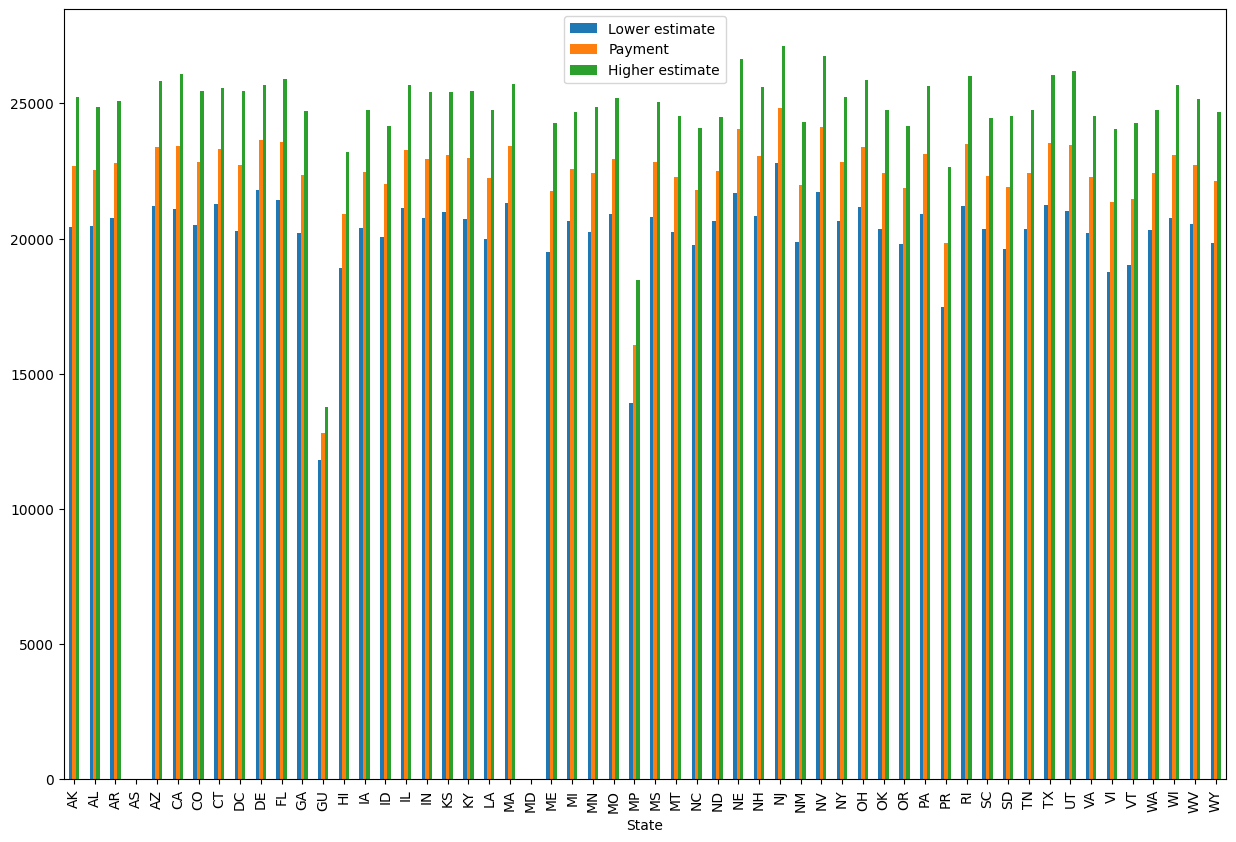

In [26]:
heart_graph_LE.plot(kind = 'bar', figsize=(15,10))

<Axes: xlabel='State'>

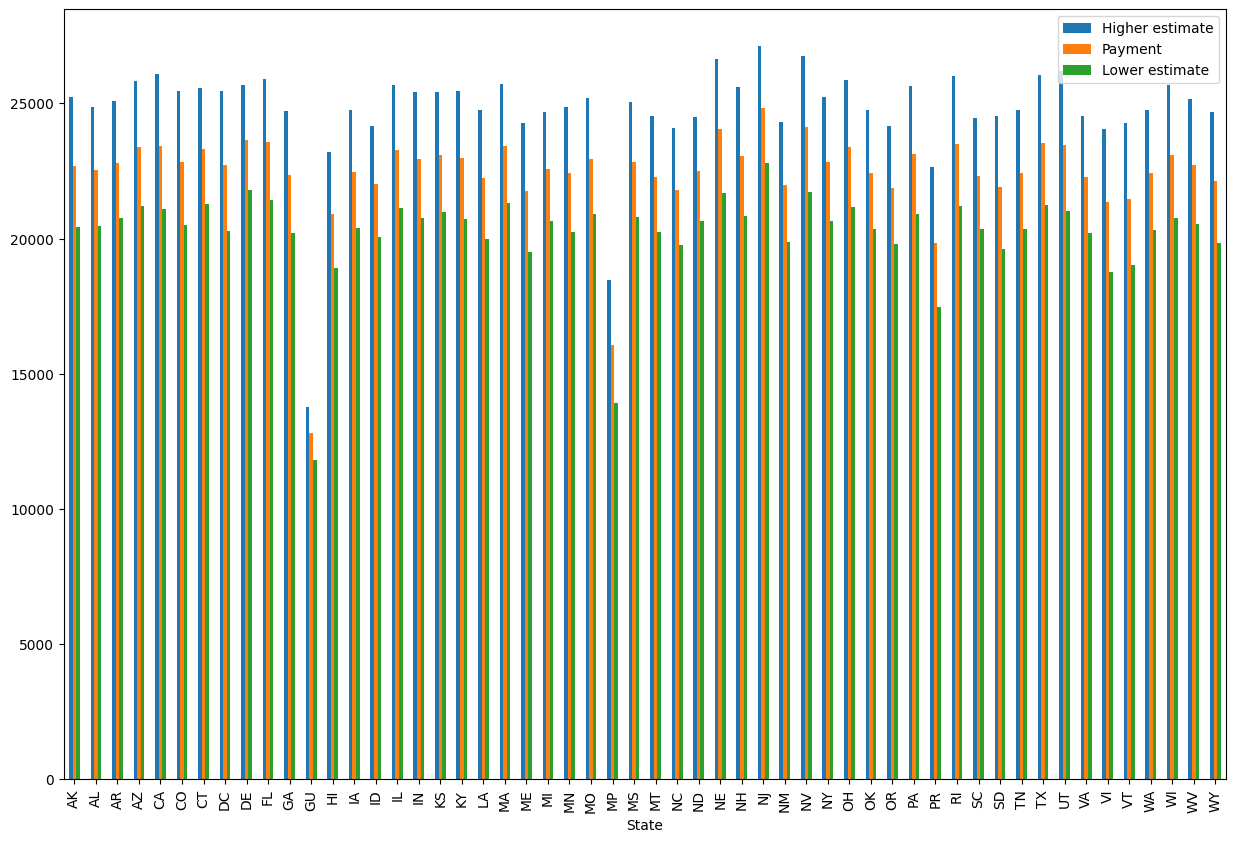

In [21]:
heart_graph_LE = heart_graph.pivot_table(index = 'State', aggfunc='mean')
heart_graph_LE = heart_graph_LE[['Higher estimate', 'Payment', 'Lower estimate']]
heart_graph_LE.plot(kind = 'bar', figsize=(15,10))

In [9]:
heart = pd.read_csv('Heart_Disease_Prediction.csv')
heart

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [13]:
stroke.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
stroke['gender'] = le.fit_transform(stroke['gender']).astype(int)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
del stroke['id']

In [15]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
stroke = stroke.rename(str.title, axis = 'columns')

In [17]:
stroke.columns = ['Sex', 'Age', 'Hypertension', 'HeartDisease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'Bmi',
       'Smoking_Status', 'Stroke']

In [18]:
heart_htn = heart[heart['BP'] >=140]
heart_htn['Hypertension'] = 1
heart_no_htn = heart[heart['BP'] <140]
heart_no_htn['Hypertension'] = 0
dataframe =[heart_no_htn,heart_htn]

heart = pd.concat(dataframe,axis=0)

<ipython-input-18-f7d5c98030b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_htn['Hypertension'] = 1
<ipython-input-18-f7d5c98030b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_no_htn['Hypertension'] = 0


In [21]:
heart['Sex'] = heart['Sex'].replace('M','Male')
heart['Sex'] = heart['Sex'].replace('F','Female')
heart['HeartDisease'] = le.fit_transform(heart['Heart Disease']).astype(int)

In [22]:
merged = heart.merge(stroke,on = ['Age', 'Sex', 'HeartDisease', 'Hypertension'], how = 'inner')
merged

<ipython-input-22-b2d5c54645b6>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged = heart.merge(stroke,on = ['Age', 'Sex', 'HeartDisease', 'Hypertension'], how = 'inner')


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Heart Disease,Hypertension,HeartDisease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,70,1,4,130,322,0,2,109,0,2.4,...,Presence,0,1,Yes,Private,Rural,93.02,40.2,formerly smoked,0
1,67,0,3,115,564,0,2,160,0,1.6,...,Absence,0,0,Yes,Govt_job,Rural,94.61,28.4,smokes,0
2,67,0,3,115,564,0,2,160,0,1.6,...,Absence,0,0,Yes,Self-employed,Urban,68.61,31.9,never smoked,0
3,67,0,3,115,564,0,2,160,0,1.6,...,Absence,0,0,Yes,Private,Rural,82.31,21.3,never smoked,0
4,67,0,3,115,564,0,2,160,0,1.6,...,Absence,0,0,Yes,Private,Urban,102.71,39.9,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,56,0,2,140,294,0,2,153,0,1.3,...,Absence,1,0,Yes,Govt_job,Urban,82.44,27.8,smokes,0
3674,56,0,2,140,294,0,2,153,0,1.3,...,Absence,1,0,Yes,Private,Rural,97.37,34.1,smokes,0
3675,56,0,2,140,294,0,2,153,0,1.3,...,Absence,1,0,No,Self-employed,Urban,87.50,20.2,formerly smoked,0
3676,56,0,2,140,294,0,2,153,0,1.3,...,Absence,1,0,Yes,Private,Rural,177.56,30.1,never smoked,0


In [23]:
merged.duplicated().sum()

0

In [24]:
merged.duplicated().sum()

0

In [25]:
merged.isnull().sum()

Age                          0
Sex                          0
Chest pain type              0
BP                           0
Cholesterol                  0
FBS over 120                 0
EKG results                  0
Max HR                       0
Exercise angina              0
ST depression                0
Slope of ST                  0
Number of vessels fluro      0
Thallium                     0
Heart Disease                0
Hypertension                 0
HeartDisease                 0
Ever_Married                 0
Work_Type                    0
Residence_Type               0
Avg_Glucose_Level            0
Bmi                        122
Smoking_Status               0
Stroke                       0
dtype: int64

In [26]:
merged = merged.dropna()

In [27]:
merged.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease',
       'Hypertension', 'HeartDisease', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status',
       'Stroke'],
      dtype='object')

In [28]:
merged.Stroke.value_counts()

0    3408
1     148
Name: Stroke, dtype: int64

In [ ]:
!pip install imblearn

In [29]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler()
x= merged[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status']]
y = merged['Stroke']
x_rus, y_rus = RUS.fit_resample(x,y)
columns = [x_rus,y_rus]
merged = pd.concat(columns, axis = 1)
merged

KeyError: ignored

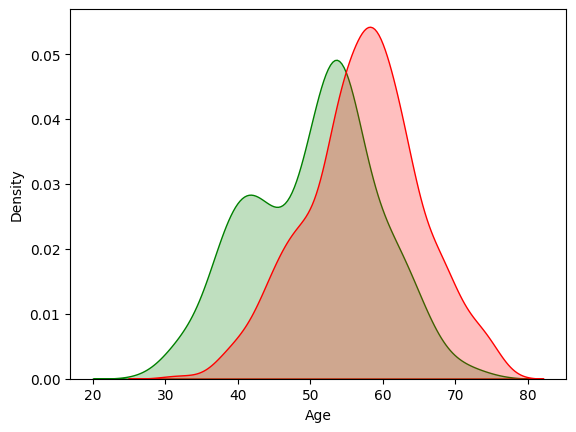

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
non_stroke_age = merged[merged["Stroke"]==0]
stroke_age = merged[merged["Stroke"]==1]
sns.kdeplot(non_stroke_age['Age'], fill=True, color = 'g')
sns.kdeplot(stroke_age['Age'], fill=True, color = 'r')
plt.show()

In [ ]:
merged.isnull().sum()

Age                  0
Sex                  0
ChestPainType        0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
ST_Slope             0
HeartDisease         0
Hypertension         0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
Bmi                  0
Smoking_Status       0
Stroke               0
dtype: int64

In [ ]:
merged.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,59,Male,NAP,130,318,0,Normal,120,Y,1.0,Flat,0,0,Yes,Self-employed,Urban,86.46,30.5,Unknown,0
1,53,Male,ASY,126,0,0,Normal,106,N,0.0,Flat,1,0,Yes,Govt_job,Urban,77.30,33.4,never smoked,0
2,47,Female,NAP,130,235,0,Normal,145,N,2.0,Flat,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0
3,37,Female,NAP,130,211,0,Normal,142,N,0.0,Up,0,0,No,Govt_job,Rural,77.37,21.4,never smoked,0
4,48,Male,ATA,100,159,0,Normal,100,N,0.0,Up,0,0,Yes,Private,Rural,106.74,33.7,formerly smoked,0


In [ ]:
col = ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope','Ever_Married', 'Work_Type','Residence_Type', 'Smoking_Status']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for column in col:
  merged[column] = le.fit_transform(merged[column]).astype(int)

In [ ]:
sns.pairplot(merged)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
RFC = RandomForestClassifier()
x= merged[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status']]
y = merged['Stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state=48)
RFC.fit(x_train,y_train)
y_predict = RFC.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

In [3]:
!pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
# print(heart_disease.variables)
heart = pd.read_csv(heart_disease.metadata['data_url'])
heart


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
